In [7]:
import tensorflow as tf
import numpy as np

# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

### create tensorflow structure start ###
Weights = tf.Variable(tf.random_uniform([1],-0.1,1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
### create tensorflow structure end ###

sess = tf.Session()
sess.run(init)  # Very important

for step in range(200):
    sess.run(train)
    if step % 20 ==0:
        print(step,sess.run(Weights),sess.run(biases))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [ 0.80954278] [-0.13797364]
20 [ 0.28435564] [ 0.19861373]
40 [ 0.14657605] [ 0.27438554]
60 [ 0.1117671] [ 0.29352871]
80 [ 0.10297286] [ 0.29836509]
100 [ 0.10075108] [ 0.29958695]
120 [ 0.10018975] [ 0.29989567]
140 [ 0.10004795] [ 0.29997364]
160 [ 0.10001211] [ 0.29999337]
180 [ 0.10000306] [ 0.29999834]


In [11]:
import tensorflow as tf

# 生成矩阵
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])
# 矩阵乘法 np.dot
product = tf.matmul(matrix1,matrix2)

# method 1
sess=tf.Session()
result = sess.run(product)
print(result)
sess.close()

# method 2
    # 运行完会自动close掉sess
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]
[[12]]


In [16]:
import tensorflow as tf

state = tf.Variable(0,name='counter')
print(state.name)
one = tf.constant(1)

new_value = tf.add(state,one)
# 把new_value加载到state
update = tf.assign(state,new_value)

# 初始化所有变量 must have if define variable
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init);
    for _ in range(3): # 三次循环
        sess.run(update)
        # 必须要用run指针
        print(sess.run(state))


counter_4:0
Instructions for updating:
Use `tf.global_variables_initializer` instead.
1
2
3


In [18]:
import tensorflow as tf

# 要给定一个type 大部分只能处理float32
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

# 乘法运算 multiply
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.],input2:[2.]}))


[ 14.]


Instructions for updating:
Use `tf.global_variables_initializer` instead.


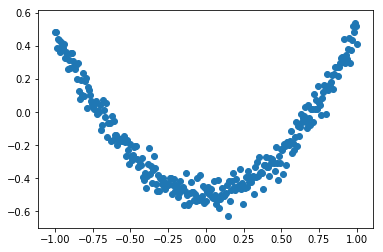

0.43447
0.0154529
0.00947109
0.00747735
0.00670519
0.00621559
0.00587104
0.00557574
0.00531699
0.00507789
0.0048878
0.00472435
0.00458567
0.00445965
0.00432739
0.00419968
0.00407728
0.00395101
0.00385496
0.00377318


In [49]:
# matplot的time类找不到 改用Spyder运行查看结果

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs,in_size,out_size,activation_function=None):
    # 初始值随机比全部为零要好
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    # 初始值全部为0.1 同上
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape) # 噪音
y_data = np.square(x_data) - 0.5 + noise

# 有点儿像函数内的变量
    # 也可以用来选择部分数据训练模型
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

# 第一个隐含层
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
# 输出层
prediction = add_layer(l1,10,1,activation_function=None)
# lose function
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
# 优化器参数 学习率，目标是minimize loss
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# 结果可视化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
# 可以任意plot 不会终止整个函数
plt.ion()
plt.show(block=False)

for i in range(1000):
    # 训练
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))   
        try:
            ax.lines.remove(lines[0])  # 取出lines的第一个线段
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
        time.sleep(0.1)


'Wed Oct 11 22:06:32 2017'